
$$f(E) = \frac{1}{1 + e^{\frac{E - E_F}{kT}}}$$



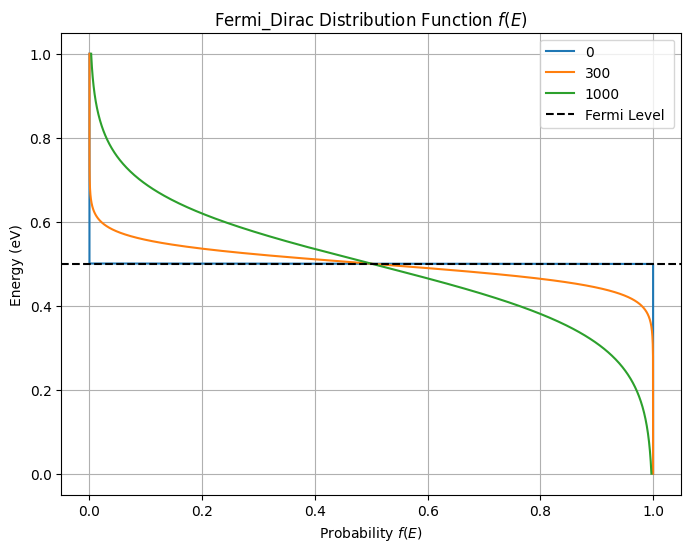

In [3]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.617e-5
E = np.linspace(0,1,1000)
Ef = 0.5
T_list = [0,300,1000]
def fermi_dirac(E, T,Ef):
    if T == 0:
        return np.where(E<Ef, 1,0)
    else:
        return 1 / (1 + np.exp((E - Ef) / (k * T)))
plt.figure(figsize=(8, 6))
for T in T_list:
    f_E = fermi_dirac(E,T,Ef)
    plt.plot(f_E,E,label = T)
plt.axhline(Ef , color ='black' , linestyle='--' ,label = "Fermi Level ")
plt.title("Fermi_Dirac Distribution Function $f(E)$")
plt.xlabel("Probability $f(E)$")
plt.ylabel("Energy (eV)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Variation of Fermi Level with Doping Concentration

**The Physics:**
Doping shifts the Fermi Level ($E_F$) from the intrinsic level ($E_i$) towards the band edges.

* **For N-type (Donors):** $E_F$ moves up towards $E_c$.
$$E_F = E_c - kT \ln\left(\frac{N_c}{N_d}\right)$$

* **For P-type (Acceptors):** $E_F$ moves down towards $E_v$.
$$E_F = E_v + kT \ln\left(\frac{N_v}{N_a}\right)$$

**Constants for Silicon (at 300K):**
* **Band Gap ($E_g$):** $1.12$ eV.
* **$N_c$:** $2.8 \times 10^{19} cm^{-3}$.
* **$N_v$:** $1.04 \times 10^{19} cm^{-3}$.
* **$kT$:** $0.0259$ eV.

1. المعطيات
2. (الثوابت اللي هتعرفها في الأول)استخدم ثوابت السيليكون دي:
3. $E_c = 1.12$ (السقف).
4. $E_v = 0$ (الأرضية).
5. $N_c = 2.8 \times 10^{19}$ (كثافة حالات التوصيل).
6. $N_v = 1.04 \times 10^{19}$ (كثافة حالات التكافؤ).
7. $kT = 0.0259$ (طاقة الحرارة).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ev = 0
Ec = 1.12
Nc = 2.8e19
Nv = 1.04e19
kT = 0.0259 # at T = 300k , k = 8.617e-5
E = np.logsapce()

AttributeError: module 'numpy' has no attribute 'logsapce'

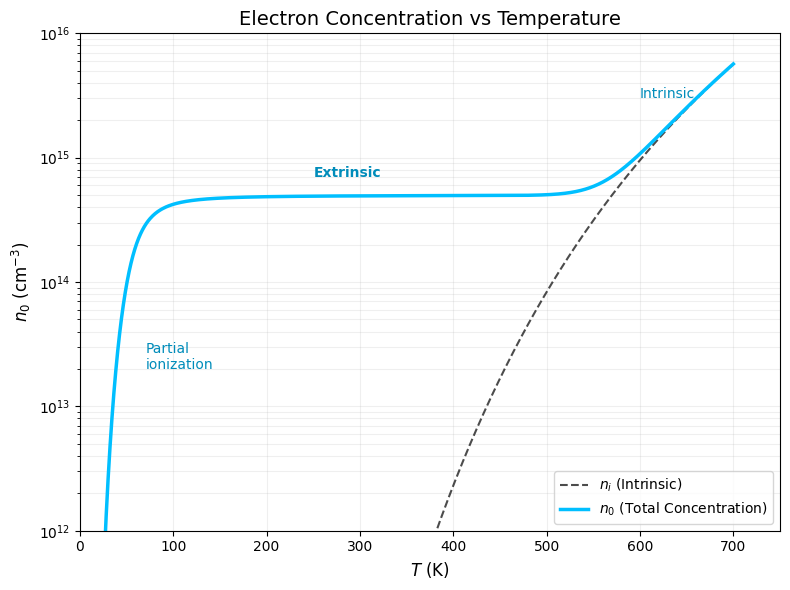

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Physics Constants (ثوابت فيزيائية للسيليكون)
k_B = 8.617e-5  # Boltzmann constant (eV/K)
Eg = 1.12       # Band gap energy (eV) for Silicon
Nd = 5e14       # Donor concentration (cm^-3) - (Plateau level)
Ed = 0.045      # Donor ionization energy (eV) - (Phosphorus in Si)

# 2. Temperature Range (نطاق درجة الحرارة)
# From 20K to 700K to match the x-axis in the image
T = np.linspace(20, 700, 1000)

# 3. Calculation Functions (المعادلات)

# A. Intrinsic Concentration (ni) - الخط المتقطع
# ni scales with T^(3/2) * exp(-Eg / 2kT)
# N_c and N_v are effective density of states constants approx 10^19
Nc_300 = 2.8e19 
ni = np.sqrt(Nc_300 * 1.04e19) * (T/300)**(1.5) * np.exp(-Eg / (2 * k_B * T))

# B. Freeze-out / Partial Ionization (Low T behavior)
# At very low T, n ~ sqrt(Nd * Nc) * exp(-Ed / 2kT)
n_freeze = np.sqrt(Nd * Nc_300 * (T/300)**1.5 / 2) * np.exp(-Ed / (2 * k_B * T))

# C. Extrinsic Region Transition
# Combining freeze-out and saturation (Nd).
# We use a harmonic mean-like approximation to transition smoothly from freeze-out to Nd
n_extrinsic = 1 / (1/n_freeze + 1/Nd)

# D. Total Electron Concentration (n0) - الخط الأزرق المتصل
# Combine Extrinsic (impurities) and Intrinsic (thermal generation)
# n0 = sqrt(n_extrinsic^2 + ni^2) is a standard approximation for the sum
n0 = np.sqrt(n_extrinsic**2 + ni**2)

# 4. Plotting (الرسم)
plt.figure(figsize=(8, 6))

# Plot ni (Dashed line)
plt.plot(T, ni, 'k--', label='$n_i$ (Intrinsic)', linewidth=1.5, alpha=0.7)

# Plot n0 (Solid Blue line)
plt.plot(T, n0, color='#00bfff', linewidth=2.5, label='$n_0$ (Total Concentration)')

# Formatting the Axes (تنسيق المحاور)
plt.yscale('log')  # Log scale for Y-axis (قياس لوغاريتمي)
plt.xlim(0, 750)
plt.ylim(1e12, 1e16)  # Adjust limits to match the image closely

# Labels and Title
plt.xlabel('$T$ (K)', fontsize=12)
plt.ylabel('$n_0$ (cm$^{-3}$)', fontsize=12)
plt.title('Electron Concentration vs Temperature', fontsize=14)

# Adding Text Annotations (النصوص التوضيحية على الرسم)
plt.text(70, 2e13, 'Partial\nionization', color='#008CBA', fontsize=10)
plt.text(250, 7e14, 'Extrinsic', color='#008CBA', fontsize=10, fontweight='bold')
plt.text(600, 3e15, 'Intrinsic', color='#008CBA', fontsize=10)

# Grid and Style
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()